# Analyse de Recettes
## Projet ADM

##### L’idée du projet est d’analyser toutes les recettes d’un site de cuisine nommé Food.com

 
#### Hypothèses : Stats des recettes

###### Dataset :
https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions

- On donne une liste d’ingrédients, on cherche la recette la plus adaptée. 
- On donne une liste d’ingrédients et on obtient le pourcentage de chance de l’origine de la recette
- On donne un régime particulier, et on cherche les recettes qui correspondent


https://www.kaggle.com/ckg18imperial/hungry-with-my-fridge, on donne une liste d’ingrédient et on a en sorti les 3 recettes les plus pertinenents en fonction des aliments et du temps de préparation (creation d’un dataframe et de son score)

- 1) On donne des ingrédients et on renvoie toutes les recettes qui contiennent tous ces ingrédients
- 2) On check entre toutes les recettes quelles sont celles qui prennent le moins de temps
- 3) On renvoie un podium avec les 3 recettes les plus pertinentes


##### Décrire le jeu de données : 

Notre jeu de données est sous format csv. 
Il provient du site Food.com, un réseau social dédié au partage de recettes. Tout le monde peut ajouter une recette, ainsi que la noter et la commenter

###### Pour chaque recette, il existe une ligne qui contient : 

- Le nom de la recette 

- Un id unique 

- Le temps de préparation, en minutes

- L’id de l’utilisateur qui a proposé cette recette

- La date de la mise en ligne de la recette sur le site 

- Les tags, ou mots clés ajoutés sur la recette par l’utilisateur

- Les détails concernant la nutrition de la recette : un array contenant [les nombres de calories, le taux de graisse total en PDV*, taux de sucre en PDV, taux de sodium en PDV, taux de protéines en PDV, le taux de graisse saturées en PDV]

- Le nombre d’étapes de la recette

- Les étapes d’une recette : un array contenant la description de chaque étape

- La description de la recette fournie par l’utilisateur

*PDV = Person Daily Value, donc le pourcentage d’apport par rapport au besoin journalier.

On commence par importer les bibliothèques et créer un DataFrame à partir de notre fichier CSV et dans notre cas on prendra 10 000 recettes au hasard.

In [175]:
import pandas as pd
import spacy 

df = pd.read_csv('data/RAW_recipes.csv')
recipes_df = df.sample(n=10000)

Ensuite on supprime les colonnes qui ne nous intéressent pas

In [176]:
del recipes_df['contributor_id']
del recipes_df['id']
del recipes_df['submitted']
del recipes_df['tags']
del recipes_df['description']
del recipes_df['steps']
recipes_df

name  minutes  \
16678                   banana mini morsel bars       30   
65247   crock pot artichoke  chicken and olives      260   
110875        incredibly cheesy turkey meatloaf       90   
123255                       lentil carrot loaf       25   
40427                          cheesy ham rolls       50   
...                                         ...      ...   
63765           creamy sauce for crab or shrimp       10   
138118                 mom s chicken cacciatore       80   
27296         bourbon marinated pork tenderloin       55   
104666                      henry s jerome bars       35   
8534              armenian choereg  breadsticks      150   

                                          nutrition  n_steps  \
16678         [58.0, 2.0, 24.0, 1.0, 1.0, 4.0, 3.0]       10   
65247     [349.3, 7.0, 36.0, 21.0, 63.0, 4.0, 14.0]        8   
110875    [430.7, 39.0, 4.0, 37.0, 74.0, 61.0, 4.0]        6   
123255   [387.7, 19.0, 29.0, 21.0, 34.0, 7.0, 18.0]       11   
40427    [809.1, 86.0, 8.0, 91.0, 97.0, 163.0, 9.0]       22   
...                                             ...      ...   
63765   [815.9, 97.0, 100.0, 97.0, 6.0, 46.0, 20.0]        2   
138118   [351.8, 23.0, 28.0, 19.0, 61.0, 13.0, 4.0]       14   
27296   [457.4, 29.0, 33.0, 108.0, 86.0, 21.0, 4.0]        9   
104666    [329.9, 33.0, 95.0, 8.0, 5.0, 57.0, 11.0]       12   
8534         [120.9, 8.0, 3.0, 6.0, 4.0, 13.0, 5.0]       16   

                                              ingredients  n_ingredients  
16678   ['all-purpose flour', 'baking powder', 'fat-fr...             10  
65247   ['boneless skinless chicken breast halves', 'f...             14  
110875  ['ground turkey', 'milk', 'italian seasoned br...              8  
123255  ['carrots', 'lentils', 'onion', 'sage', 'curry...              9  
40427   ['green beans', 'ham slices', 'butter', 'flour...             10  
...                                                   ...            ...  
63765   ['mayonnaise', 'chili sauce', 'ketchup', 'taba...              6  
138118  ['olive oil', 'garlic', 'rosemary', 'mushrooms...              9  
27296   ['pork tenderloin', 'soy sauce', 'bourbon', 'w...             13  
104666  ['graham crackers', 'butter', 'sugar', 'egg', ...              9  
8534    ['flour', 'salt', 'sugar', 'milk', 'yeast', 'w...             12  

[10000 rows x 6 columns]

##### On charge Spacy en Agnlais

In [177]:
nlp = spacy.load('en_core_web_sm')

On peut ensuite verifier les types de chaques colonnes

In [178]:
recipes_df.dtypes

name             object
minutes           int64
nutrition        object
n_steps           int64
ingredients      object
n_ingredients     int64
dtype: object

Ici nous avons rencontré un problème car le format de chaque row etait en réalité un string et non une liste.

In [179]:
print(recipes_df["ingredients"])

16678     ['all-purpose flour', 'baking powder', 'fat-fr...
65247     ['boneless skinless chicken breast halves', 'f...
110875    ['ground turkey', 'milk', 'italian seasoned br...
123255    ['carrots', 'lentils', 'onion', 'sage', 'curry...
40427     ['green beans', 'ham slices', 'butter', 'flour...
                                ...                        
63765     ['mayonnaise', 'chili sauce', 'ketchup', 'taba...
138118    ['olive oil', 'garlic', 'rosemary', 'mushrooms...
27296     ['pork tenderloin', 'soy sauce', 'bourbon', 'w...
104666    ['graham crackers', 'butter', 'sugar', 'egg', ...
8534      ['flour', 'salt', 'sugar', 'milk', 'yeast', 'w...
Name: ingredients, Length: 10000, dtype: object


Pour palier a ce probème il faut définir une fonction nous permettant de transformer chaque string en liste.

In [180]:
def strToList(input_str):
    return input_str.strip('][').replace("'", "").split(', ')
ingredientsCleaned = recipes_df['ingredients'].apply(strToList)

In [181]:
print(ingredientsCleaned)

16678     [all-purpose flour, baking powder, fat-free ma...
65247     [boneless skinless chicken breast halves, fres...
110875    [ground turkey, milk, italian seasoned breadcr...
123255    [carrots, lentils, onion, sage, curry powder, ...
40427     [green beans, ham slices, butter, flour, milk,...
                                ...                        
63765     [mayonnaise, chili sauce, ketchup, tabasco sau...
138118    [olive oil, garlic, rosemary, mushrooms, tomat...
27296     [pork tenderloin, soy sauce, bourbon, worceste...
104666    [graham crackers, butter, sugar, egg, evaporat...
8534      [flour, salt, sugar, milk, yeast, warm water, ...
Name: ingredients, Length: 10000, dtype: object


Ensuite on crée on array numpy et une liste contenant tous les ingrédients de notre échantillon

In [164]:
import numpy as np

ingredientsArray = np.array(ingredientsCleaned)
ListeIngredients = list()
for i in ingredientsArray:
    for i in i:
        ListeIngredients.append(i)
print(ListeIngredients[0:100])

['pine nuts', 'parmesan cheese', 'sun-dried tomato', 'garlic clove', 'olive oil', 'linguine', 'ground black pepper', 'basil leaves', 'peanut butter', 'sugar', 'egg', 'chocolate chips', 'pork tenderloin', 'barbecue sauce', 'onion', 'chili powder', 'coleslaw mix', 'hamburger buns', 'corn', 'cream', 'fresh rosemary', 'butter', 'salt & pepper', 'lemon cream-filled vanilla sandwich cookies', 'butter', 'cream cheese', 'sugar', 'cornstarch', 'eggs', 'egg yolk', 'frozen pink lemonade concentrate', 'vanilla extract', 'red food coloring', 'fresh lemon juice', 'lemon slice', 'butter', 'brown sugar', 'cinnamon', 'whole wheat flour', 'baking powder', 'salt', 'baking soda', 'ground ginger', 'ground cloves', 'pumpkin puree', 'milk', 'eggs', 'vanilla', 'powdered sugar', 'water', 'spinach', 'arugula leaf', 'dijon mustard', 'sour cream', 'half-and-half', 'garlic', 'eggs', 'lemons', 'sugar', 'unsalted butter', 'almonds', 'sugar', 'salt', 'honey', 'water', 'almond oil', 'potatoes', 'butter', 'onion', 'sal

#### Statistiques
Grace a FreqDist() on peut voir les ingrédients les plus présents dans notre échantillon

In [168]:
nltk.FreqDist(ListeIngredients)

FreqDist({'salt': 3694, 'butter': 2314, 'sugar': 1859, 'onion': 1676, 'water': 1478, 'eggs': 1434, 'olive oil': 1409, 'garlic cloves': 1123, 'flour': 1071, 'milk': 1047, ...})

Nombre d'ingrédients de notre échantillon

In [199]:
stats, freq = dict(), dict()
freq = nltk.FreqDist(ListeIngredients)
stats = {'Total': len(ListeIngredients), 'Unique': len(freq)}
print(stats)

{'Total': 90664, 'Unique': 5689}


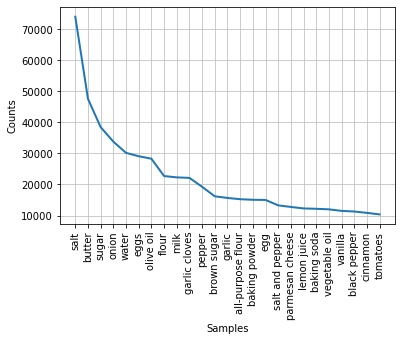

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [155]:
freq.plot(25, cumulative=False)

<AxesSubplot:title={'center':"Nombre d'ingrédients"}>

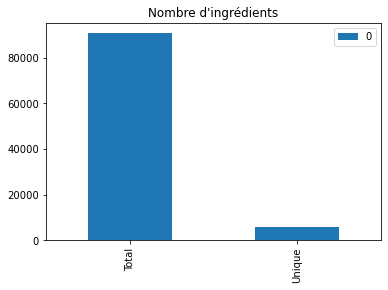

In [201]:
df_test = pd.DataFrame.from_dict(stats, orient='index')
df_test.plot(kind='bar', title="Nombre d'ingrédients")

In [172]:
first_recipe_name = df.loc[0, "name"]
first_recipe_ingredient = df.loc[0, "ingredients"]
print(first_recipe_name)
print(first_recipe_ingredient)

arriba   baked winter squash mexican style
['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']


In [173]:
for i in range(50) :
    recipe_ingredient = df.loc[i, "ingredients"]    
print(recipe_ingredient)

['whole kernel corn', 'onion', 'red bell pepper', 'butter', 'jiffy corn muffin mix', 'egg', 'heavy cream', 'jalapenos', 'sharp cheddar cheese', 'honey']


In [182]:
list_recipe_ingredient = nlp(recipe_ingredient)

In [202]:
def strToList(input_str):
    return input_str.strip('][').replace("'", "").split(', ')
ingredientsCleaned = df['ingredients'].apply(strToList)

In [186]:
#conversion ingredient recipe str into list
list_recipe_ingredient_tokenized = list()
for ingredient in list_recipe_ingredient:
    list_recipe_ingredient_tokenized.append(ingredient.lemma_)
    print(ingredient.lemma_)

[
'
whole
kernel
corn
'
,
'
onion
'
,
'
red
bell
pepper
'
,
'
butter
'
,
'
jiffy
corn
muffin
mix
'
,
'
egg
'
,
'
heavy
cream
'
,
'
jalapenos
'
,
'
sharp
cheddar
cheese
'
,
'
honey
'
]


In [187]:
#ingredients search by the user
list_searched_ingredients = ['butter', 'honey']

In [203]:
#add a score to the recipe relative to the number of search ingredient in the recipe
score = 0
for searched_ingredient in list_searched_ingredients: 
    for recipe_ingredient in list_recipe_ingredient_tokenized:
        if searched_ingredient == recipe_ingredient:
            score += 1
print(score)

0


In [204]:
#get duration of the first recipe
first_recipe_time = df.loc[0, "minutes"]
print(first_recipe_time)

55


In [205]:
#create dataFrame with the recipe's name, the number of ingredients search and recipe's duration
df_recipes_comparison = pd.DataFrame(columns=['recipe name', 'ingredient score', 'recipe duration'])
print(df_recipes_comparison)

Empty DataFrame
Columns: [recipe name, ingredient score, recipe duration]
Index: []
